In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

In [10]:
def load_data(file_path):
    return pd.read_csv(file_path)
df = load_data('dataset.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [15]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes

df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [14]:
df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [19]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [20]:
X = df.drop(columns='expenses')
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [22]:
y = df['expenses']
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=52)
X_train

,age,sex,bmi,children,smoker,region
860,37,0,47.6,2,1,3
1296,18,1,26.1,0,0,0
454,32,1,46.5,2,0,2
557,34,1,34.2,0,0,2
136,19,1,34.1,0,0,3
...,...,...,...,...,...,...
924,43,1,23.2,0,0,3
86,57,0,31.2,0,1,1
151,48,1,29.7,0,0,2
779,53,1,28.9,0,0,1


In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
m = model.coef_
m

array([  258.06053924,   -79.32168943,   344.26053405,   363.61696655,
       24307.0977617 ,  -410.98444794])

In [28]:
c = model.intercept_
c

-12007.942291020774

In [32]:
y_pred_train = model.predict(X_train)
y_pred_train

array([37728.47743243,  1543.02566447, 12084.05314559, ...,
        9702.21086829, 11128.08958518, 11371.8896713 ])

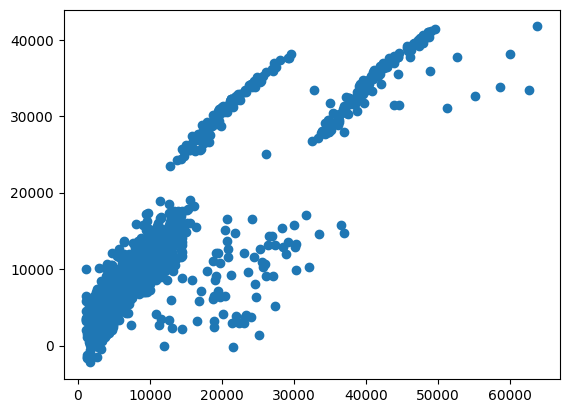

In [41]:
plt.scatter(y_train, y_pred_train)
plt.show()

In [45]:
r2_score(y_train, y_pred_train)

0.7623109912217001

In [47]:
y_pred_test = model.predict(X_test)
y_pred_test

array([ 4.95167130e+03,  3.17550642e+03,  2.30085523e+02,  9.98674027e+03,
        2.34398060e+04,  1.59401317e+04,  3.26020068e+04,  8.74013984e+03,
        1.63047075e+03,  1.25194979e+04,  1.63071434e+04,  1.92121853e+03,
        9.16614957e+03,  9.25760953e+03,  3.86031203e+04,  8.33953492e+03,
        4.13490981e+03,  2.96567055e+04,  3.59786982e+04,  4.39791709e+03,
        3.37704405e+04,  8.48249910e+03,  3.74410194e+04,  1.30088508e+04,
        3.69637761e+03,  2.79498430e+04,  5.16936232e+03,  7.01649843e+03,
        1.65000992e+04,  6.57546480e+03,  1.21797149e+03,  1.30225283e+04,
        9.80857646e+03,  7.54824555e+03,  2.89198873e+04,  3.42458410e+04,
        4.40565028e+03,  1.22567316e+04,  5.07040846e+03,  7.58273161e+03,
        4.76799173e+03,  8.12992075e+03,  2.81177634e+04,  7.29555071e+03,
        3.34654462e+04,  1.51654403e+04,  6.48361547e+03,  3.93231597e+04,
        1.08156628e+04,  1.24443513e+04,  1.24547064e+04, -2.77298780e+02,
        8.66153125e+03,  

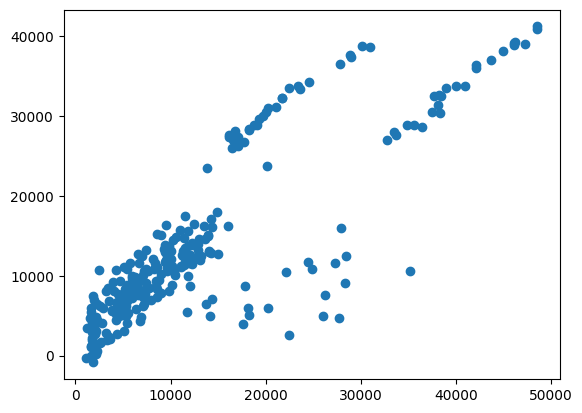

In [48]:
plt.scatter(y_test, y_pred_test)
plt.show()

In [49]:
r2_score(y_test, y_pred_test)

0.6918803132251011